In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# encoding And Scale
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder,RobustScaler

# Model
from sklearn.linear_model import LogisticRegression,RidgeClassifier

from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('german_credit_data.csv')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


## Data Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [4]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
data.describe(include=object)

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [6]:
data.describe(exclude=object)

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
data.isnull()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
for col in data.columns:
    p=(data[col].isnull().sum()/len(data))*100
    print('the column {0} have {1} percent of NAN values'.format(col,p.round(2)))
    print()


the column Unnamed: 0 have 0.0 percent of NAN values

the column Age have 0.0 percent of NAN values

the column Sex have 0.0 percent of NAN values

the column Job have 0.0 percent of NAN values

the column Housing have 0.0 percent of NAN values

the column Saving accounts have 18.3 percent of NAN values

the column Checking account have 39.4 percent of NAN values

the column Credit amount have 0.0 percent of NAN values

the column Duration have 0.0 percent of NAN values

the column Purpose have 0.0 percent of NAN values



C:\Users\Bunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


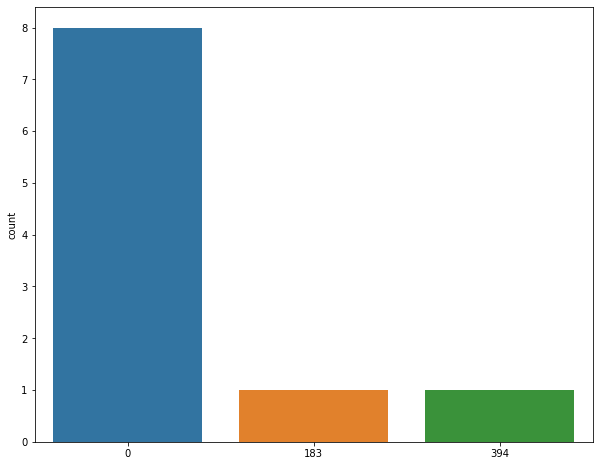

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data.isnull().sum())
plt.show()

In [12]:
data.select_dtypes(include=object)

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,NaN,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,NaN,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,NaN,furniture/equipment
996,male,own,little,little,car
997,male,own,little,NaN,radio/TV
998,male,free,little,little,radio/TV


In [13]:
data.select_dtypes(exclude=object)

,Unnamed: 0,Age,Job,Credit amount,Duration
0,0,67,2,1169,6
1,1,22,2,5951,48
2,2,49,1,2096,12
3,3,45,2,7882,42
4,4,53,2,4870,24
...,...,...,...,...,...
995,995,31,1,1736,12
996,996,40,3,3857,30
997,997,38,2,804,12
998,998,23,2,1845,45


In [14]:
data.dtypes[data.dtypes != 'object'].index

Index(['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [15]:
data.dtypes[data.dtypes == 'object'].index

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [16]:
object1 = data.select_dtypes(include = object).columns

In [17]:
object1

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [18]:
data.nunique()


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

In [19]:
#{column: len(data[column].unique()) for column in data.columns}

In [20]:
data.values

array([[0, 67, 'male', ..., 1169, 6, 'radio/TV'],
       [1, 22, 'female', ..., 5951, 48, 'radio/TV'],
       [2, 49, 'male', ..., 2096, 12, 'education'],
       ...,
       [997, 38, 'male', ..., 804, 12, 'radio/TV'],
       [998, 23, 'male', ..., 1845, 45, 'radio/TV'],
       [999, 27, 'male', ..., 4576, 45, 'car']], dtype=object)

In [21]:
data.value_counts()

Unnamed: 0  Age  Sex     Job  Housing  Saving accounts  Checking account  Credit amount  Duration  Purpose            
1           22   female  2    own      little           moderate          5951           48        radio/TV               1
677         24   male    2    own      moderate         moderate          5595           72        radio/TV               1
668         43   male    2    rent     little           little            4843           12        car                    1
666         34   male    2    own      rich             moderate          3496           30        furniture/equipment    1
664         50   female  1    own      little           rich              1047           6         education              1
                                                                                                                         ..
321         32   male    2    own      little           little            1938           24        radio/TV               1
320         2

In [22]:
data.duplicated().any()

False

In [23]:
#plt.figure(figsize=(10,8))
#data.corr().plot().scatter(data.Age,data.Duration)
#plt.show()


In [24]:
data.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


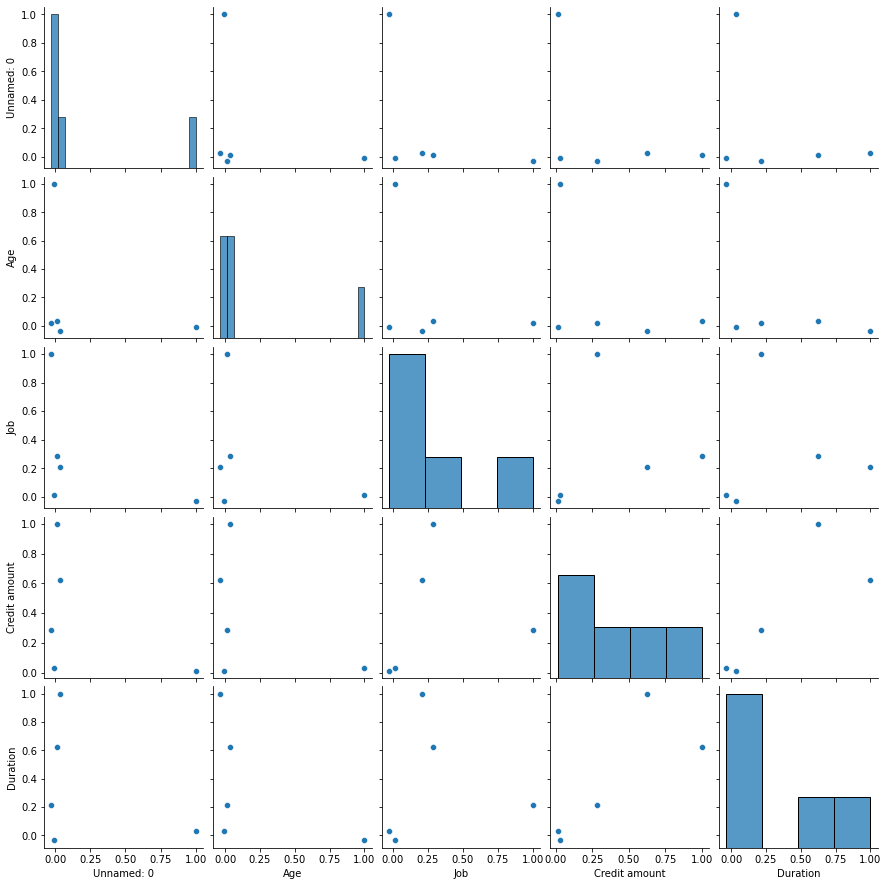

In [25]:
sns.pairplot(data.corr())

## Data Pre-Processing

### Handling Missing Value

In [26]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [27]:
data.drop(data[['Unnamed: 0']],axis=1,inplace=True)

In [28]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


## Saving accounts

In [29]:
data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [30]:
data['Saving accounts'].fillna(method='ffill', inplace=True)

In [31]:
data['Saving accounts'].fillna(method='bfill', inplace=True)

In [32]:
data['Saving accounts'].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [33]:
data['Saving accounts'].value_counts()

little        741
moderate      127
quite rich     75
rich           57
Name: Saving accounts, dtype: int64

In [34]:
data['Saving accounts'].isnull().sum()

0

## Checking account

In [35]:
data['Checking account'].isnull().sum()

394

In [36]:
data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [37]:
data['Checking account'].fillna(method='ffill', inplace=True)

In [38]:
data['Checking account'].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [39]:
data['Checking account'].isnull().sum()

0

In [40]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
dtype: bool

In [41]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,moderate,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Convert_Object_To_Numerical

## Sex

In [42]:
Encoder = LabelEncoder()
Encoder.fit_transform(data.Sex)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [43]:
data.Sex = pd.DataFrame(Encoder.fit_transform(data.Sex))

In [44]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,own,little,little,1169,6,radio/TV
1,22,0,2,own,little,moderate,5951,48,radio/TV
2,49,1,1,own,little,moderate,2096,12,education
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car


In [45]:
encodind_features = data[['Housing','Saving accounts','Checking account','Purpose']]



In [46]:
encodind_features

,Housing,Saving accounts,Checking account,Purpose
0,own,little,little,radio/TV
1,own,little,moderate,radio/TV
2,own,little,moderate,education
3,free,little,little,furniture/equipment
4,free,little,little,car
...,...,...,...,...
995,own,little,little,furniture/equipment
996,own,little,little,car
997,own,little,little,radio/TV
998,free,little,little,radio/TV


In [47]:
dummies = pd.get_dummies(encodind_features)

In [48]:
data = pd.concat([data,dummies], axis=1)

In [61]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,own,little,little,1169,6,radio/TV,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,0,2,own,little,moderate,5951,48,radio/TV,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,own,little,moderate,2096,12,education,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,free,little,little,7882,42,furniture/equipment,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,free,little,little,4870,24,car,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,own,little,little,1736,12,furniture/equipment,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
996,40,1,3,own,little,little,3857,30,car,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,38,1,2,own,little,little,804,12,radio/TV,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
998,23,1,2,free,little,little,1845,45,radio/TV,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [50]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,own,little,little,1169,6,radio/TV,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,0,2,own,little,moderate,5951,48,radio/TV,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,own,little,moderate,2096,12,education,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,free,little,little,7882,42,furniture/equipment,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,free,little,little,4870,24,car,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [64]:
data = data.drop(encodind_features,axis=1)

In [65]:
data

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1169,6,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1736,12,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
996,40,1,3,3857,30,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,38,1,2,804,12,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
998,23,1,2,1845,45,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [66]:
X = data.drop('Sex',axis=1)
y = data.Sex


In [67]:
X

,Age,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [68]:
y

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Name: Sex, Length: 1000, dtype: int32

## Data_Scaling

In [70]:
Scaling = StandardScaler()
Scaling.fit_transform(X)

array([[ 2.76645648,  0.14694918, -0.74513141, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.19140394,  0.14694918,  0.94981679, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [ 1.18331231, -1.38377145, -0.41656241, ..., -0.62360956,
        -0.14998296, -0.11020775],
       ...,
       [ 0.21583532,  0.14694918, -0.87450324, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.10345149,  0.14694918, -0.50552769, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-0.75164167,  0.14694918,  0.46245715, ..., -0.62360956,
        -0.14998296, -0.11020775]])

In [73]:
X = pd.DataFrame(Scaling.fit_transform(X),columns=X.columns)

In [74]:
X

,Age,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.146949,-0.745131,-1.236478,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,0.146949,0.949817,2.248194,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,-1.383771,-0.416562,-0.738668,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.146949,1.634247,1.750384,2.873893,-1.576173,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.146949,0.566664,0.256953,2.873893,-1.576173,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.383771,-0.544162,-0.738668,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
996,0.391740,1.677670,0.207612,0.754763,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
997,0.215835,0.146949,-0.874503,-0.738668,-0.347960,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
998,-1.103451,0.146949,-0.505528,1.999289,2.873893,-1.576173,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


## Split_For_Training_Testing

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [82]:
X_train.head()

,Age,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
420,-1.367309,0.146949,-0.030219,-0.489762,-0.34796,-1.576173,2.141633,-1.691450,-0.381412,-0.284747,4.067414,-0.908195,1.085656,-0.312562,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.62361,-0.149983,-0.110208
278,-0.311879,0.146949,0.474863,-1.236478,-0.34796,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.62361,-0.149983,-0.110208
218,-1.015499,-1.383771,-0.088702,0.256953,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.62361,-0.149983,-0.110208
363,-1.279356,0.146949,-0.533529,-1.236478,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,-0.921102,3.199368,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.62361,-0.149983,-0.110208
850,-0.223927,0.146949,-0.367295,-0.074920,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.62361,-0.149983,-0.110208


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 420 to 520
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          700 non-null    float64
 1   Job                          700 non-null    float64
 2   Credit amount                700 non-null    float64
 3   Duration                     700 non-null    float64
 4   Housing_free                 700 non-null    float64
 5   Housing_own                  700 non-null    float64
 6   Housing_rent                 700 non-null    float64
 7   Saving accounts_little       700 non-null    float64
 8   Saving accounts_moderate     700 non-null    float64
 9   Saving accounts_quite rich   700 non-null    float64
 10  Saving accounts_rich         700 non-null    float64
 11  Checking account_little      700 non-null    float64
 12  Checking account_moderate    700 non-null    float64
 13  Checking account_r

In [85]:
X_test

,Age,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
249,-1.191404,0.146949,-1.006002,-0.240857,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,-0.921102,3.199368,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
353,-0.663689,0.146949,1.037719,-0.738668,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
537,0.127883,0.146949,0.120774,-0.240857,-0.34796,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
424,-0.927547,0.146949,-0.180503,-0.738668,-0.34796,0.634448,-0.466933,-1.691450,2.621834,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
564,0.127883,1.677670,0.510661,0.256953,-0.34796,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,3.051111,-0.712949,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,-0.575737,0.146949,-0.412309,-1.236478,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,-0.908195,1.085656,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
838,2.414647,0.146949,-0.111387,0.256953,-0.34796,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
974,-0.223927,0.146949,-0.156047,0.754763,-0.34796,0.634448,-0.466933,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
203,-1.279356,0.146949,-0.839768,-0.738668,-0.34796,-1.576173,2.141633,0.591209,-0.381412,-0.284747,-0.245856,1.101086,-0.921102,-0.312562,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208


In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 249 to 425
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          300 non-null    float64
 1   Job                          300 non-null    float64
 2   Credit amount                300 non-null    float64
 3   Duration                     300 non-null    float64
 4   Housing_free                 300 non-null    float64
 5   Housing_own                  300 non-null    float64
 6   Housing_rent                 300 non-null    float64
 7   Saving accounts_little       300 non-null    float64
 8   Saving accounts_moderate     300 non-null    float64
 9   Saving accounts_quite rich   300 non-null    float64
 10  Saving accounts_rich         300 non-null    float64
 11  Checking account_little      300 non-null    float64
 12  Checking account_moderate    300 non-null    float64
 13  Checking account_r

In [90]:
y_train

420    0
278    0
218    1
363    1
850    1
      ..
855    1
871    1
835    1
792    1
520    1
Name: Sex, Length: 700, dtype: int32

In [92]:
y_test

249    0
353    1
537    0
424    0
564    1
      ..
193    1
838    1
974    0
203    1
425    1
Name: Sex, Length: 300, dtype: int32

## Model_Training_Testing

In [93]:
log_reg = LogisticRegression()

In [94]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [102]:
y_test_pred = log_reg.predict(X_test)


In [103]:
y_train_pred = log_reg.predict(X_train)

### Classification_Report

In [105]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39        83
           1       0.77      0.91      0.83       217

    accuracy                           0.74       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.71      0.74      0.71       300



In [106]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.26      0.37       227
           1       0.72      0.93      0.81       473

    accuracy                           0.71       700
   macro avg       0.68      0.59      0.59       700
weighted avg       0.70      0.71      0.67       700



### Training_Testing_Accurancy_Score

In [109]:
training_Score = log_reg.score(X_train, y_train)

In [110]:
training_Score

0.7128571428571429

In [113]:
testing_score =  log_reg.score(X_test, y_test)

In [114]:
testing_score

0.74

### Confusion_matrix

In [117]:
print(confusion_matrix(y_train,y_train_pred))

[[ 58 169]
 [ 32 441]]


In [118]:
print(confusion_matrix(y_test,y_test_pred))

[[ 25  58]
 [ 20 197]]


In [121]:
#log_reg.intercept_

array([0.813323])

In [132]:
# log_reg.coef_

In [133]:
#pd.DataFrame(log_reg.coef_,columns = X.columns)